Please upload the 'Housing_task_3.csv' file when prompted...


Saving Housing task 3.csv to Housing task 3.csv

File 'Housing task 3.csv' uploaded successfully!


=== Dataset Overview ===
Shape: (545, 13) (rows, columns)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished

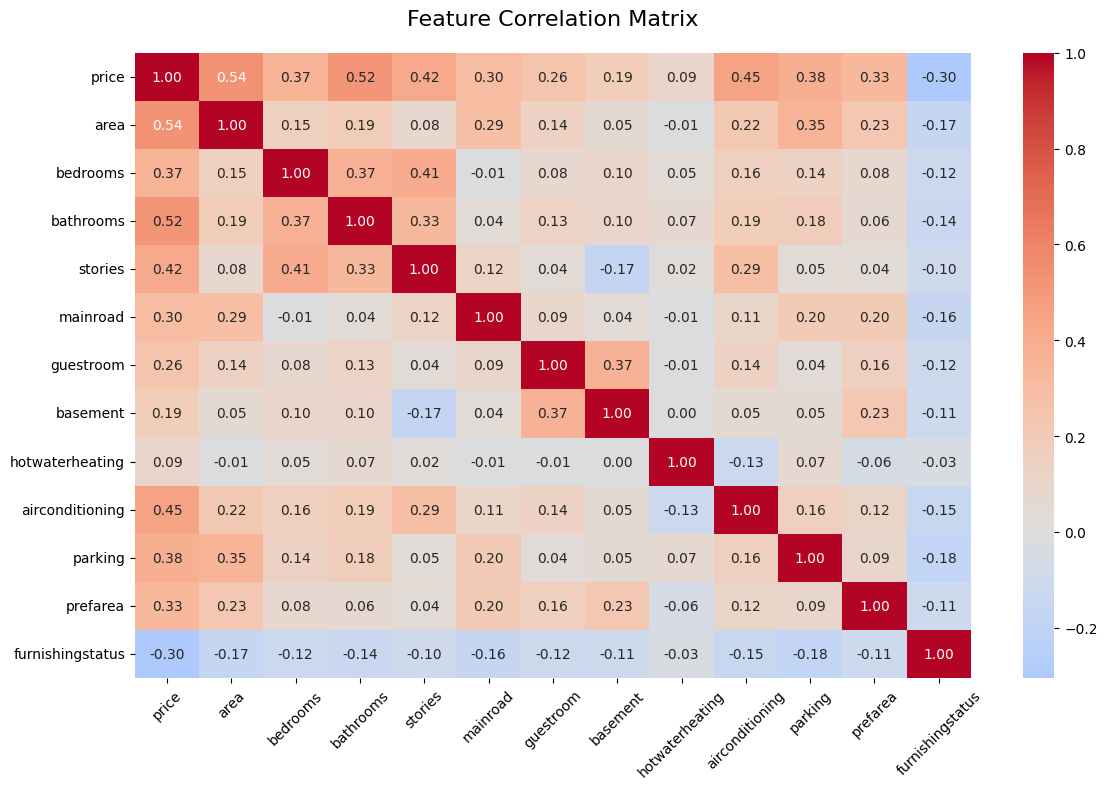



=== Simple Linear Regression Results ===
- MAE: ₹1,474,748.13
- MSE: ₹3,675,286,604,768.19
- RMSE: ₹1,917,103.70
- R² Score: 0.2729


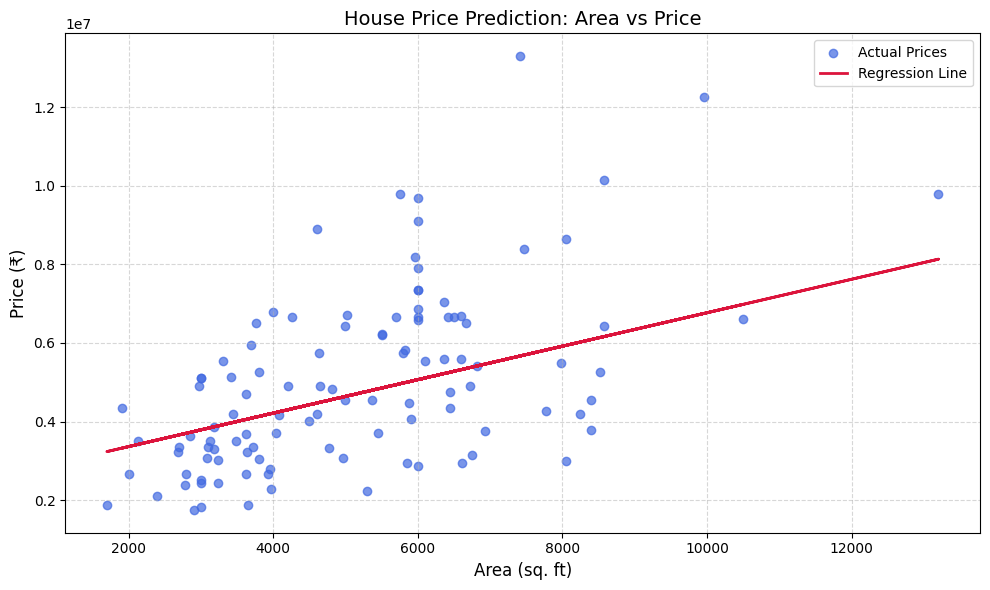


=== Model Coefficients ===
Intercept (baseline price): ₹2,512,254.26
Area coefficient: ₹425.73 per sq.ft

Interpretation: Each additional square foot increases the home price by ₹ 425.73, on average.


=== Multiple Linear Regression Results ===
- MAE: ₹979,679.69
- MSE: ₹1,771,751,116,594.04
- RMSE: ₹1,331,071.42
- R² Score: 0.6495

Sample Predictions:
            Actual      Predicted
316  ₹4,060,000.00  ₹5,203,691.71
77   ₹6,650,000.00  ₹7,257,004.02
360  ₹3,710,000.00  ₹3,062,828.60
90   ₹6,440,000.00  ₹4,559,591.65
493  ₹2,800,000.00  ₹3,332,932.31
209  ₹4,900,000.00  ₹3,563,080.68
176  ₹5,250,000.00  ₹5,645,466.31
249  ₹4,543,000.00  ₹6,413,979.67
516  ₹2,450,000.00  ₹2,755,831.55
426  ₹3,353,000.00  ₹2,668,938.66


/tmp/ipython-input-2-3192791990.py:157: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(comparison.head(10).applymap(lambda x: f"₹{x:,.2f}"))


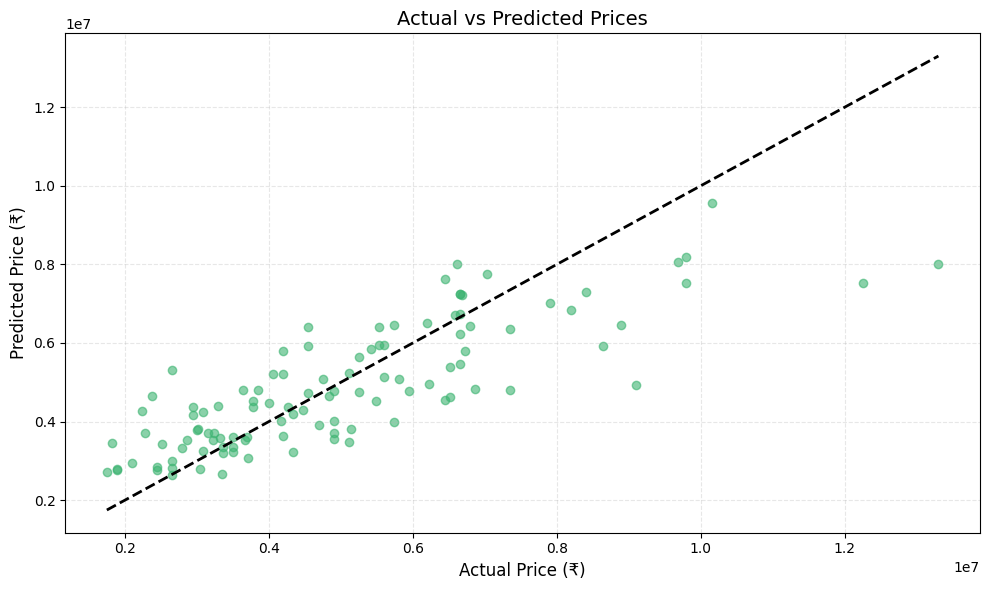


=== Feature Importance ===
             Feature        Impact
2          bathrooms  1.097117e+06
8    airconditioning  7.855506e+05
7    hotwaterheating  6.878813e+05
10          prefarea  6.299017e+05
3            stories  4.062232e+05
6           basement  3.931598e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
9            parking  2.257565e+05
1           bedrooms  7.857449e+04
0               area  2.358488e+02
11  furnishingstatus -2.103971e+05


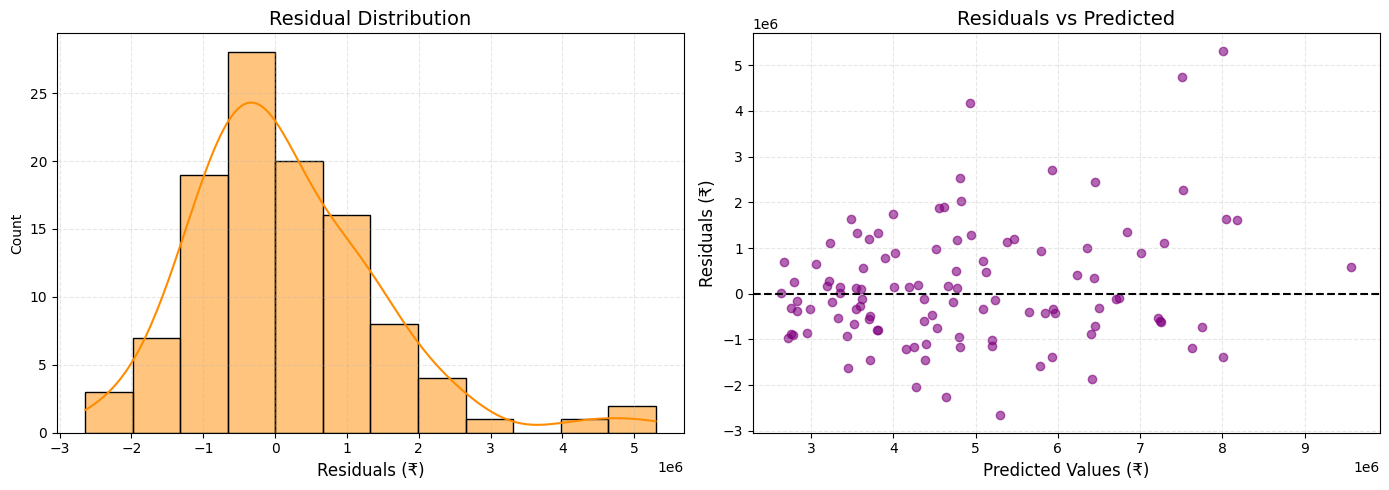



=== Model Comparison ===
Model                            R² Score
----------------------------------------
Simple Regression (Area only)      0.2729
Multiple Regression (All features)     0.6495

The multiple regression model explains 138.0% more variance than the simple model.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# ======================
# 1. DATA LOADING
# ======================

# Upload the dataset to Colab
print("Please upload the 'Housing_task_3.csv' file when prompted...")
uploaded = files.upload()

# Get the uploaded filename (handles case sensitivity)
filename = next(iter(uploaded))
print(f"\nFile '{filename}' uploaded successfully!\n")

# Load the dataset
data = pd.read_csv(filename)

# ======================
# 2. DATA EXPLORATION
# ======================

print("\n=== Dataset Overview ===")
print(f"Shape: {data.shape} (rows, columns)")
print("\nFirst 5 rows:")
print(data.head())

print("\n\n=== Data Types ===")
print(data.info())

print("\n\n=== Statistical Summary ===")
print(data.describe())

print("\n\n=== Missing Values ===")
print(data.isnull().sum())

# ======================
# 3. DATA PREPROCESSING
# ======================

# Convert categorical variables to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']

print("\n\n=== Before Encoding ===")
print(data[categorical_cols].head())

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

print("\n=== After Encoding ===")
print(data[categorical_cols].head())

# Visualize correlations
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Matrix", pad=20, fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ======================
# 4. SIMPLE LINEAR REGRESSION (AREA vs PRICE)
# ======================

# Prepare data
X_simple = data[['area']]
y_simple = data['price']

# Split data (80% train, 20% test)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42)

# Train model
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

# Make predictions
y_pred_s = simple_model.predict(X_test_s)

# Evaluate
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)

print("\n\n=== Simple Linear Regression Results ===")
print(f"- MAE: ₹{mae_s:,.2f}")
print(f"- MSE: ₹{mse_s:,.2f}")
print(f"- RMSE: ₹{rmse_s:,.2f}")
print(f"- R² Score: {r2_s:.4f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, color='royalblue', alpha=0.7, label='Actual Prices')
plt.plot(X_test_s, y_pred_s, color='crimson', linewidth=2, label='Regression Line')
plt.title('House Price Prediction: Area vs Price', fontsize=14)
plt.xlabel('Area (sq. ft)', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Interpret coefficients
print("\n=== Model Coefficients ===")
print(f"Intercept (baseline price): ₹{simple_model.intercept_:,.2f}")
print(f"Area coefficient: ₹{simple_model.coef_[0]:.2f} per sq.ft")
print("\nInterpretation: Each additional square foot increases the home price by ₹",
      f"{simple_model.coef_[0]:.2f}, on average.")

# ======================
# 5. MULTIPLE LINEAR REGRESSION
# ======================

# Prepare data
X_multi = data.drop('price', axis=1)
y_multi = data['price']

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

# Train model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Make predictions
y_pred_m = multi_model.predict(X_test_m)

# Evaluate
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)

print("\n\n=== Multiple Linear Regression Results ===")
print(f"- MAE: ₹{mae_m:,.2f}")
print(f"- MSE: ₹{mse_m:,.2f}")
print(f"- RMSE: ₹{rmse_m:,.2f}")
print(f"- R² Score: {r2_m:.4f}")

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test_m, 'Predicted': y_pred_m})
print("\nSample Predictions:")
print(comparison.head(10).applymap(lambda x: f"₹{x:,.2f}"))

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_m, y_pred_m, color='mediumseagreen', alpha=0.6)
plt.plot([y_test_m.min(), y_test_m.max()],
         [y_test_m.min(), y_test_m.max()],
         'k--', lw=2)
plt.title('Actual vs Predicted Prices', fontsize=14)
plt.xlabel('Actual Price (₹)', fontsize=12)
plt.ylabel('Predicted Price (₹)', fontsize=12)
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X_multi.columns,
    'Impact': multi_model.coef_
}).sort_values('Impact', ascending=False)

print("\n=== Feature Importance ===")
print(coefficients)

# ======================
# 6. RESIDUAL ANALYSIS
# ======================

residuals = y_test_m - y_pred_m

plt.figure(figsize=(14, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='darkorange')
plt.title('Residual Distribution', fontsize=14)
plt.xlabel('Residuals (₹)', fontsize=12)
plt.grid(linestyle='--', alpha=0.3)

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred_m, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted', fontsize=14)
plt.xlabel('Predicted Values (₹)', fontsize=12)
plt.ylabel('Residuals (₹)', fontsize=12)
plt.grid(linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# ======================
# 7. MODEL COMPARISON
# ======================

print("\n\n=== Model Comparison ===")
print(f"{'Model':<30} {'R² Score':>10}")
print("-" * 40)
print(f"{'Simple Regression (Area only)':<30} {r2_s:>10.4f}")
print(f"{'Multiple Regression (All features)':<30} {r2_m:>10.4f}")

improvement = (r2_m - r2_s) / r2_s * 100
print(f"\nThe multiple regression model explains {improvement:.1f}% more variance than the simple model.")

In [ ]:
from google.colab import files
uploaded = files.upload()